# EDA - BCI Challenge

## Modules

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [82]:
import sys
sys.path.append('../src/')

import utils

## Importing data

In [83]:
train = pd.read_csv('../data/train_data.csv')
test = pd.read_csv('../data/test_data.csv')

train_copy = train.copy()

## Summary

In [84]:
train_copy.head()

id     mes tipo_ban     tipo_seg categoria tipo_com tipo_cat  \
0  abdd0c8d3be5  202002     BAN1     NO PROD3        V5     COM4   RUBRO5   
1  5b290c34ff68  202006     BAN1        PROD1        V2     COM2   RUBRO5   
2  54b8678ab09b  201901     BAN1  PROD1/PROD2        V4     COM3   RUBRO3   
3  77e1b37ea594  202004     BAN1     NO PROD3        V6     COM4   RUBRO2   
4  7b6c7a3b57a9  202101     BAN1        PROD1        V2     COM2   RUBRO4   

  tipo_cli  VAR1_sum  VAR1_prom  ...  VAR27_sum  VAR27_prom  VAR27_trx  \
0     CLI1       NaN        NaN  ...        NaN         NaN        NaN   
1     CLI1       NaN        NaN  ...        NaN         NaN        NaN   
2     CLI1       NaN        NaN  ...        NaN         NaN        NaN   
3     CLI1       NaN        NaN  ...        NaN         NaN        NaN   
4     CLI2       NaN        NaN  ...        NaN         NaN        NaN   

   VAR28_sum  VAR28_prom  VAR28_trx  VAR29_prom  VAR29_ratio  VAR30_sum  \
0        NaN         NaN        NaN         NaN          NaN        NaN   
1        NaN         NaN        NaN     17081.5        0.034        NaN   
2        NaN         NaN        NaN    706250.0        0.706        NaN   
3        NaN         NaN        NaN   7632694.0        0.954        NaN   
4        NaN         NaN        NaN    376664.0        0.443       70.0   

   target_mes  
0        0.00  
1        6.19  
2       22.78  
3       55.06  
4        0.19  

[5 rows x 70 columns]

In [85]:
train_copy.shape

(667691, 70)

### Missing values

Plotting missing values

In [87]:
df_missing_values = utils.dataframe_missing_values(train_copy)
df_missing_values_test = utils.dataframe_missing_values(test)

<AxesSubplot:title={'center':'TEST'}, xlabel='%'>

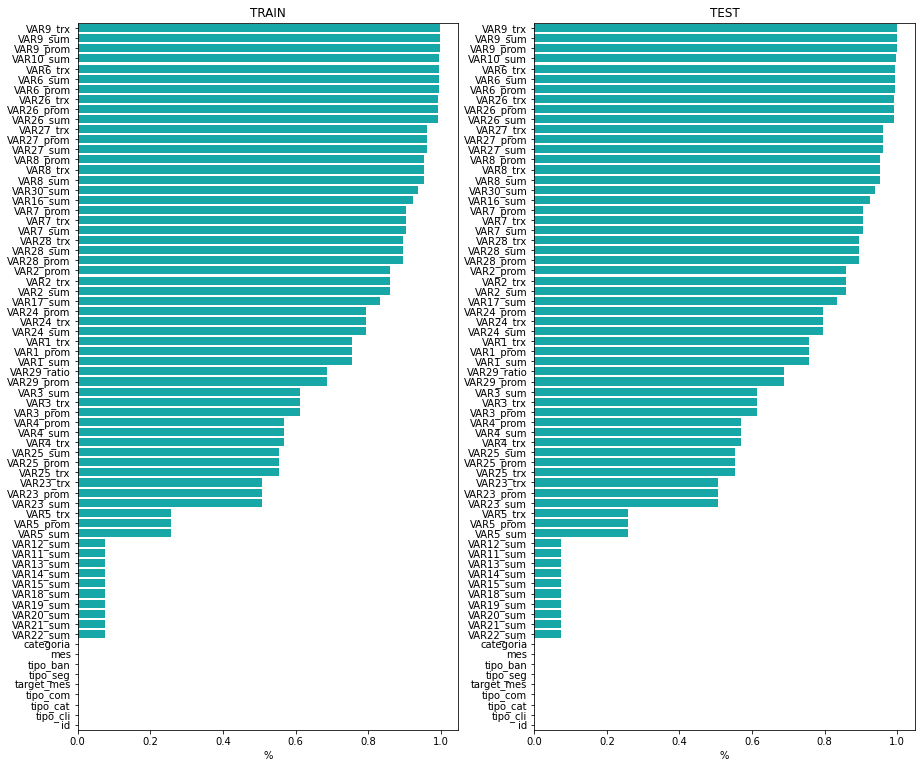

In [88]:
df_missing_values = utils.dataframe_missing_values(train_copy)
df_missing_values_test = utils.dataframe_missing_values(train_copy)

plt.figure(figsize=(15,13))

plt.subplot(1, 2, 1)
plt.title('TRAIN')
sns.barplot(x=df_missing_values['%'], 
            y=df_missing_values.index, 
            color='c', 
            order=df_missing_values.index[::-1])

plt.subplot(1, 2, 2)
plt.title('TEST')
sns.barplot(x=df_missing_values_test['%'], 
            y=df_missing_values_test.index, 
            color='c', 
            order=df_missing_values_test.index[::-1])

In [89]:
columns_most_nan_values = utils.get_columns_with_nan_values(train_copy)
print(columns_most_nan_values)

Index(['VAR23_sum', 'VAR23_prom', 'VAR23_trx', 'VAR25_trx', 'VAR25_prom',
       'VAR25_sum', 'VAR4_trx', 'VAR4_sum', 'VAR4_prom', 'VAR3_prom',
       'VAR3_trx', 'VAR3_sum', 'VAR29_prom', 'VAR29_ratio', 'VAR1_sum',
       'VAR1_prom', 'VAR1_trx', 'VAR24_sum', 'VAR24_trx', 'VAR24_prom',
       'VAR17_sum', 'VAR2_sum', 'VAR2_trx', 'VAR2_prom', 'VAR28_prom',
       'VAR28_sum', 'VAR28_trx', 'VAR7_sum', 'VAR7_trx', 'VAR7_prom',
       'VAR16_sum', 'VAR30_sum', 'VAR8_sum', 'VAR8_trx', 'VAR8_prom',
       'VAR27_sum', 'VAR27_prom', 'VAR27_trx', 'VAR26_sum', 'VAR26_prom',
       'VAR26_trx', 'VAR6_prom', 'VAR6_sum', 'VAR6_trx', 'VAR10_sum',
       'VAR9_prom', 'VAR9_sum', 'VAR9_trx'],
      dtype='object')


In [90]:
train_copy.drop(columns_most_nan_values, axis=1, inplace=True)
test.drop(columns_most_nan_values, axis=1, inplace=True)

In [91]:
assert len(train_copy.columns) == len(test.columns) + 1, 'Number of columns mismatch'

In [92]:
df_missing_values.shape[0], df_missing_values_test.shape[0], 

(70, 70)

<AxesSubplot:title={'center':'TEST'}, xlabel='%'>

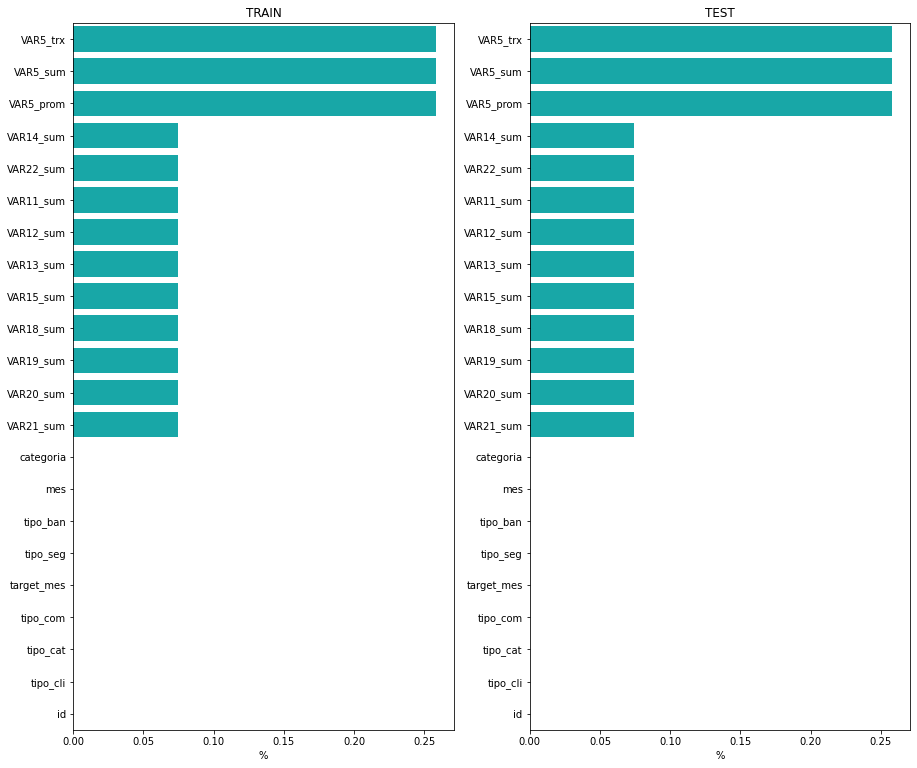

In [94]:
df_missing_values = utils.dataframe_missing_values(train_copy)
df_missing_values_test = utils.dataframe_missing_values(train_copy)

plt.figure(figsize=(15,13))

plt.subplot(1, 2, 1)
plt.title('TRAIN')
sns.barplot(x=df_missing_values['%'], 
            y=df_missing_values.index,
            color='c', 
            order=df_missing_values.index[::-1]
           )

plt.subplot(1, 2, 2)
plt.title('TEST')
sns.barplot(x=df_missing_values_test['%'], 
            y=df_missing_values_test.index, 
            color='c', 
            order=df_missing_values_test.index[::-1])

In [10]:
train_copy.describe()

mes      VAR5_sum     VAR5_prom       VAR5_trx     VAR11_sum  \
count  667691.000000  4.954090e+05  4.954090e+05  495409.000000  6.179930e+05   
mean   201975.788959  2.248450e+07  1.284525e+06      23.751040  1.260595e+08   
std        74.658239  9.730962e+07  1.423612e+06     108.156432  6.226922e+08   
min    201812.000000  1.001000e+03  1.001000e+03       1.000000  0.000000e+00   
25%    201907.000000  1.340000e+06  2.445336e+05       2.000000  2.006690e+05   
50%    202003.000000  5.164000e+06  7.000000e+05       6.000000  1.054624e+07   
75%    202010.000000  1.659631e+07  1.870276e+06      17.000000  6.518084e+07   
max    202109.000000  9.943597e+09  7.000000e+06   14626.000000  3.811678e+10   

          VAR12_sum     VAR13_sum     VAR14_sum     VAR15_sum     VAR18_sum  \
count  6.179930e+05  6.179930e+05  6.179930e+05  6.179930e+05  6.179930e+05   
mean   7.872785e+07  1.240690e+08  3.186194e+05  6.058867e+05  4.608448e+01   
std    4.484223e+08  6.226304e+08  3.024396e+06  3.677109e+06  1.187768e+04   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  5.481900e+04  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  9.272466e+06  0.000000e+00  0.000000e+00  0.000000e+00   
75%    3.141552e+07  6.038835e+07  0.000000e+00  0.000000e+00  0.000000e+00   
max    2.410679e+10  3.811678e+10  1.547436e+08  1.547436e+08  6.084460e+06   

           VAR19_sum      VAR20_sum     VAR21_sum     VAR22_sum     target_mes  
count  617993.000000  617993.000000  6.179930e+05  6.179930e+05  667691.000000  
mean        0.001743       0.017084  1.051513e+04  2.872212e+05     182.383308  
std         0.648322       9.104270  8.545224e+05  1.942102e+06     986.394827  
min         0.000000       0.000000  0.000000e+00  0.000000e+00       0.000000  
25%         0.000000       0.000000  0.000000e+00  0.000000e+00       8.580000  
50%         0.000000       0.000000  0.000000e+00  0.000000e+00      25.500000  
75%         0.000000       0.000000  0.000000e+00  0.000000e+00      85.140000  
max       375.000000    6999.000000  3.917386e+08  1.038690e+08   69430.190000

In [11]:
train_copy.head()

id     mes tipo_ban     tipo_seg categoria tipo_com tipo_cat  \
0  abdd0c8d3be5  202002     BAN1     NO PROD3        V5     COM4   RUBRO5   
1  5b290c34ff68  202006     BAN1        PROD1        V2     COM2   RUBRO5   
2  54b8678ab09b  201901     BAN1  PROD1/PROD2        V4     COM3   RUBRO3   
3  77e1b37ea594  202004     BAN1     NO PROD3        V6     COM4   RUBRO2   
4  7b6c7a3b57a9  202101     BAN1        PROD1        V2     COM2   RUBRO4   

  tipo_cli    VAR5_sum    VAR5_prom  ...    VAR12_sum    VAR13_sum  VAR14_sum  \
0     CLI1    675920.0   675920.000  ...   29202006.0   30034225.0        0.0   
1     CLI1    250000.0   250000.000  ...          0.0          0.0        0.0   
2     CLI1   5500000.0  2750000.000  ...          0.0   98591062.0        0.0   
3     CLI1  71106222.0  2942132.238  ...  121330008.0  136616628.0        0.0   
4     CLI2  41311000.0  2278964.286  ...   28534803.0   28534803.0        0.0   

   VAR15_sum  VAR18_sum  VAR19_sum  VAR20_sum  VAR21_sum  VAR22_sum  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        0.0     4722.0        0.0   
4  6481373.0        0.0        0.0        0.0        0.0  6481373.0   

   target_mes  
0        0.00  
1        6.19  
2       22.78  
3       55.06  
4        0.19  

[5 rows x 22 columns]

In [12]:
train_copy.VAR21_sum[train_copy.VAR21_sum==0]

0         0.0
1         0.0
2         0.0
4         0.0
5         0.0
         ... 
667686    0.0
667687    0.0
667688    0.0
667689    0.0
667690    0.0
Name: VAR21_sum, Length: 550639, dtype: float64

<AxesSubplot:xlabel='VAR5_sum', ylabel='Count'>

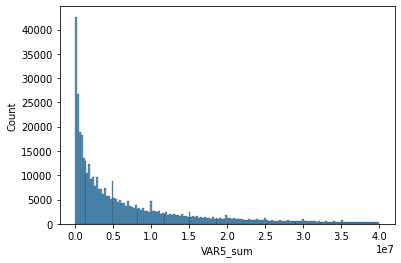

In [13]:
sns.histplot(train_copy.VAR5_sum[train_copy.VAR5_sum<4e7])

## Categorical features

BAN1    556222
BAN3     61653
BAN2     48774
BAN4      1042
Name: tipo_ban, dtype: int64


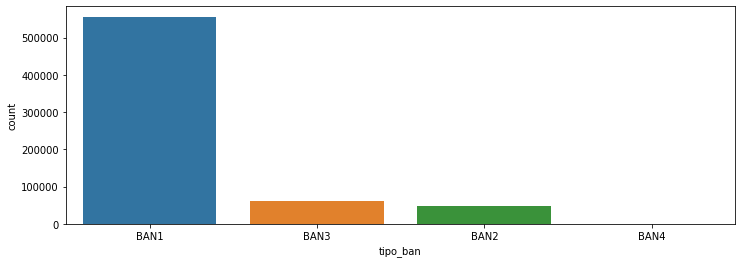

PROD1          150501
NO PROD3       126653
PROD1/PROD2     88515
PROD1/PROD4     75525
MULTIPROD       64957
SINPROD         62584
PROD4           29211
PROD1/PROD3     17074
NO PROD2        16221
NO PROD4        13682
PROD3/PROD4      7716
PROD3            5618
PROD2            3929
PROD2/PROD4      3788
NO PROD1         1470
PROD3/PROD2       247
Name: tipo_seg, dtype: int64


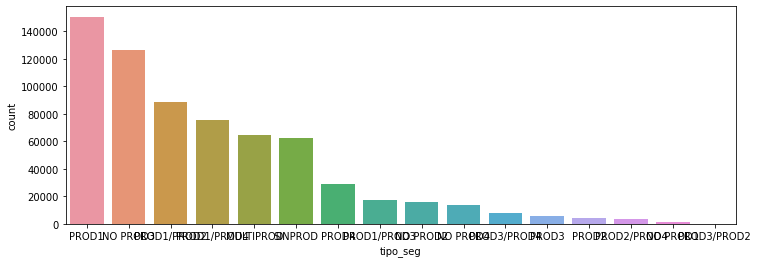

V2    328005
V4    144671
V6     92962
V5     51197
V3     49553
V1      1303
Name: categoria, dtype: int64


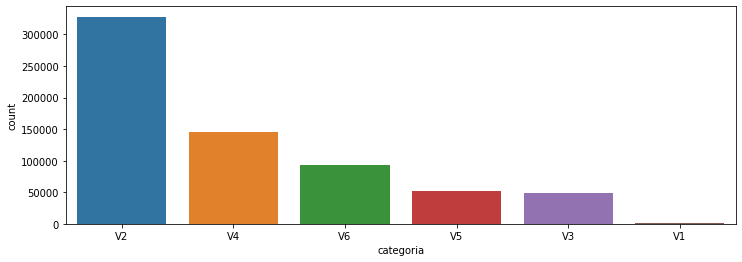

COM3    192865
COM2    189259
COM4    158026
COM5     64957
COM1     62584
Name: tipo_com, dtype: int64


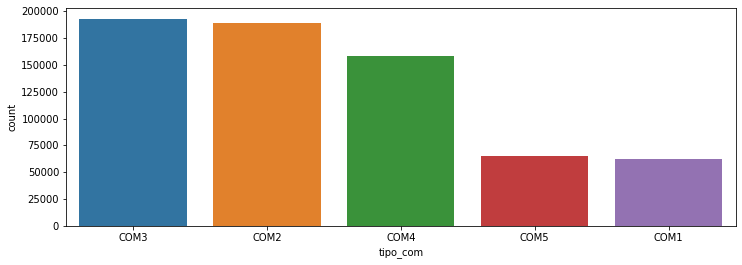

RUBRO3     153416
RUBRO4      91414
RUBRO5      84513
RUBRO6      69312
RUBRO1      62794
RUBRO7      41518
RUBRO8      40963
RUBRO2      23767
RUBRO12     19428
RUBRO9      15432
RUBRO13     14769
RUBRO14     10460
RUBRO10     10347
RUBRO17      9865
RUBRO15      6346
RUBRO16      4528
RUBRO19      4156
RUBRO18      1758
RUBRO11      1712
RUBRO20       899
RUBRO21       294
Name: tipo_cat, dtype: int64


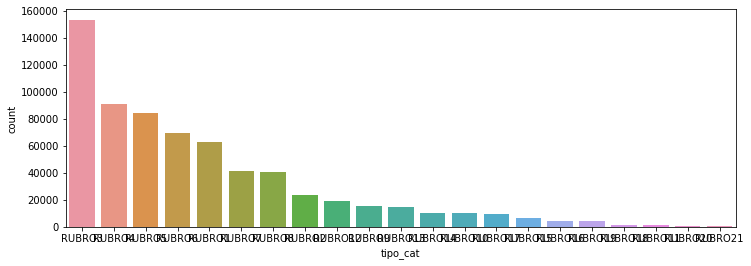

CLI1    584175
CLI2     83516
Name: tipo_cli, dtype: int64


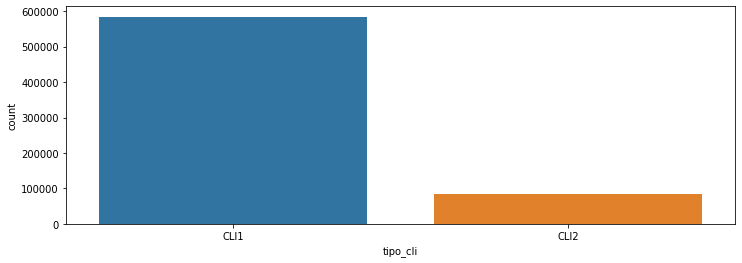

In [15]:
categorical_columns = train_copy.drop(['id','mes'], axis=1).select_dtypes('object').columns

for column in categorical_columns:
    value_counts = train_copy[column].value_counts()
    print(value_counts)
    plt.figure(figsize=(12,4))
    sns.countplot(x=train_copy[column], order=value_counts.index)    
    plt.show()
    print('============================================================================')
    print('============================================================================')

BAN1    238838
BAN3     20188
BAN2     15884
Name: tipo_ban, dtype: int64


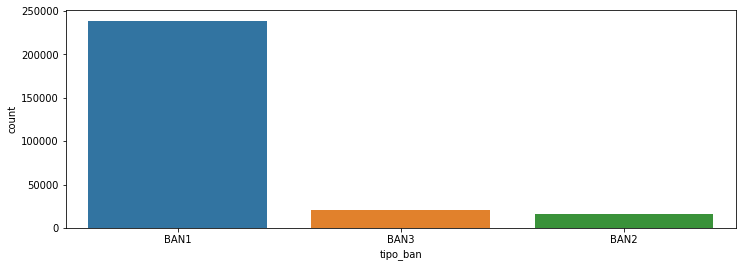

PROD1          64239
NO PROD3       56712
PROD1/PROD2    37065
PROD1/PROD4    34114
MULTIPROD      30716
SINPROD        21444
PROD4           9182
PROD1/PROD3     7912
NO PROD2        7696
NO PROD4        5830
Name: tipo_seg, dtype: int64


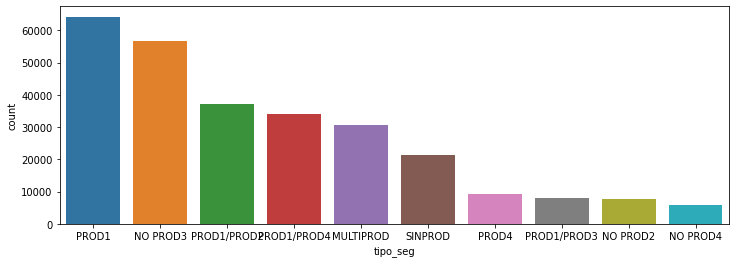

V2    130099
V4     63954
V6     34254
V3     23345
V5     23258
Name: categoria, dtype: int64


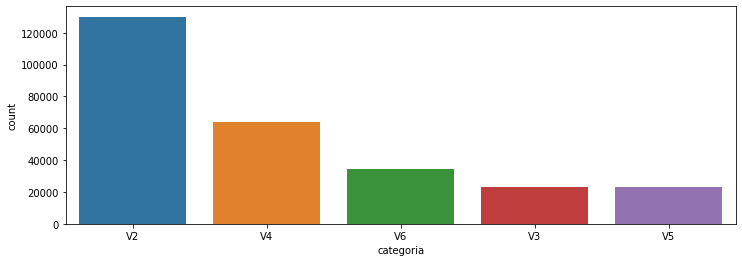

COM3    79091
COM2    73421
COM4    70238
COM5    30716
COM1    21444
Name: tipo_com, dtype: int64


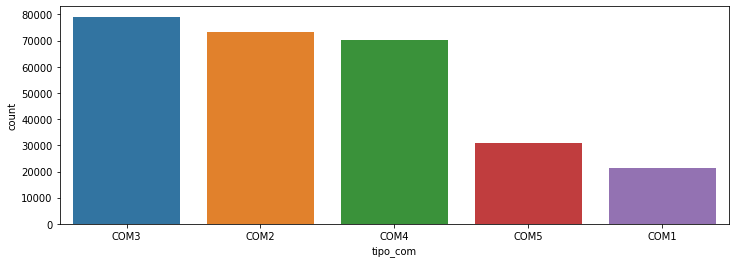

RUBRO3     65703
RUBRO5     38353
RUBRO4     38345
RUBRO6     29281
RUBRO1     24586
RUBRO7     17260
RUBRO8     16880
RUBRO2     10736
RUBRO12     7998
RUBRO13     6150
RUBRO9      5664
RUBRO10     5120
RUBRO17     4638
RUBRO14     4196
Name: tipo_cat, dtype: int64


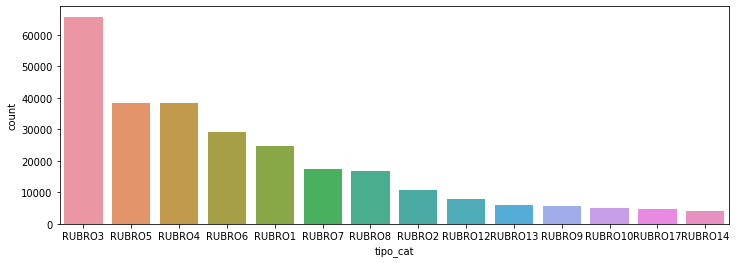

CLI1    239659
CLI2     35251
Name: tipo_cli, dtype: int64


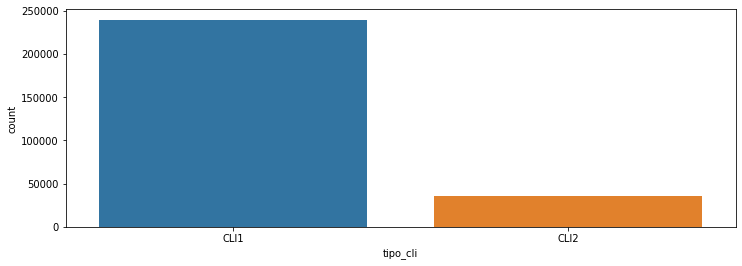

In [105]:
categorical_columns_test = test.drop(['id','mes'], axis=1).select_dtypes('object').columns

for column in categorical_columns_test:
    value_counts = test[column].value_counts()
    print(value_counts)
    plt.figure(figsize=(12,4))
    sns.countplot(x=test[column], order=value_counts.index)    
    plt.show()
    print('============================================================================')
    print('============================================================================')

### Categories to remove

Filtering categories in both train and test datesets:

In [95]:
# tipo_ban

tipo_ban_less_categories = utils.less_frequent_categories(train_copy.tipo_ban, n=10000)
print(tipo_ban_less_categories)

['BAN4']


In [96]:
train_copy = train_copy[~train_copy.tipo_ban.isin(tipo_ban_less_categories)]
test = test[~test.tipo_ban.isin(tipo_ban_less_categories)]

In [97]:
# tipo_se

tipo_seg_less_categories = utils.less_frequent_categories(train_copy.tipo_seg, n=10000)
print(tipo_seg_less_categories)

['PROD3/PROD4', 'PROD3', 'PROD2', 'PROD2/PROD4', 'NO PROD1', 'PROD3/PROD2']


In [98]:
train_copy = train_copy[~train_copy.tipo_seg.isin(tipo_seg_less_categories)]
test = test[~test.tipo_seg.isin(tipo_seg_less_categories)]

In [99]:
# categoria

categoria_less_categories = utils.less_frequent_categories(train_copy.categoria, n=10000)
print(categoria_less_categories)

['V1']


In [100]:
train_copy = train_copy[~train_copy.categoria.isin(categoria_less_categories)]
test = test[~test.categoria.isin(categoria_less_categories)]

In [101]:
# tipo_cat

tipo_cat_less_categories = utils.less_frequent_categories(train_copy.tipo_cat, n=9000)
print(tipo_cat_less_categories)

['RUBRO15', 'RUBRO16', 'RUBRO19', 'RUBRO18', 'RUBRO11', 'RUBRO20', 'RUBRO21']


In [102]:
train_copy = train_copy[~train_copy.tipo_cat.isin(tipo_cat_less_categories)]
test = test[~test.tipo_cat.isin(tipo_cat_less_categories)]

Checking whether both datasets cointain same category in categorical features:

In [154]:
for column in categorical_columns:
    is_match = train_copy['categoria'].value_counts().index.difference(test['categoria'].value_counts().index).tolist()==[]
    print(f'Column {column} \tmatch: {is_match}')

Column tipo_ban 	match: True
Column tipo_seg 	match: True
Column categoria 	match: True
Column tipo_com 	match: True
Column tipo_cat 	match: True
Column tipo_cli 	match: True


In [155]:
train_copy.isna().sum()

id                 0
mes                0
tipo_ban           0
tipo_seg           0
categoria          0
tipo_com           0
tipo_cat           0
tipo_cli           0
VAR5_sum      160195
VAR5_prom     160195
VAR5_trx      160195
VAR11_sum      40897
VAR12_sum      40897
VAR13_sum      40897
VAR14_sum      40897
VAR15_sum      40897
VAR18_sum      40897
VAR19_sum      40897
VAR20_sum      40897
VAR21_sum      40897
VAR22_sum      40897
target_mes         0
dtype: int64

## Target

<AxesSubplot:xlabel='mes', ylabel='target_mes'>

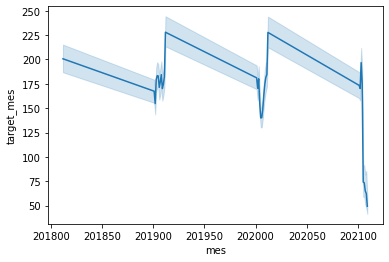

In [104]:
sns.lineplot(x=train_copy.mes, y=train_copy.target_mes)

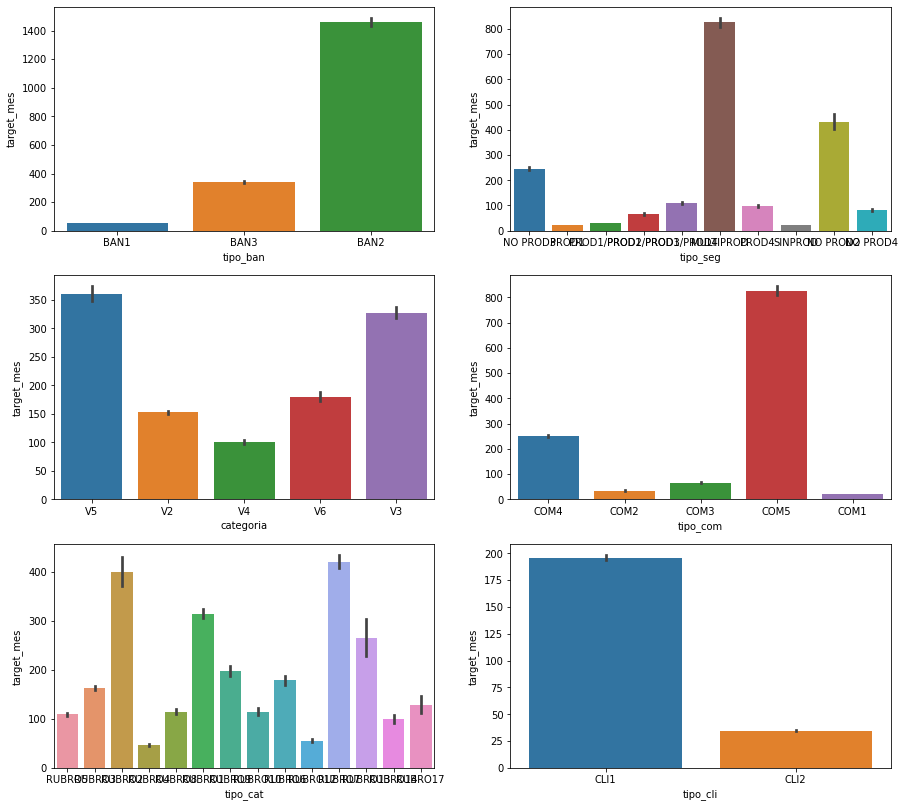

In [26]:
fig, axis = plt.subplots(3, 2, figsize=(15, 14))
plt.subplots_adjust(hspace=.2)
for column, ax in zip(categorical_columns, axis.flatten()):
    sns.barplot(x=train_copy[column], y=train_copy.target_mes, ax=ax)

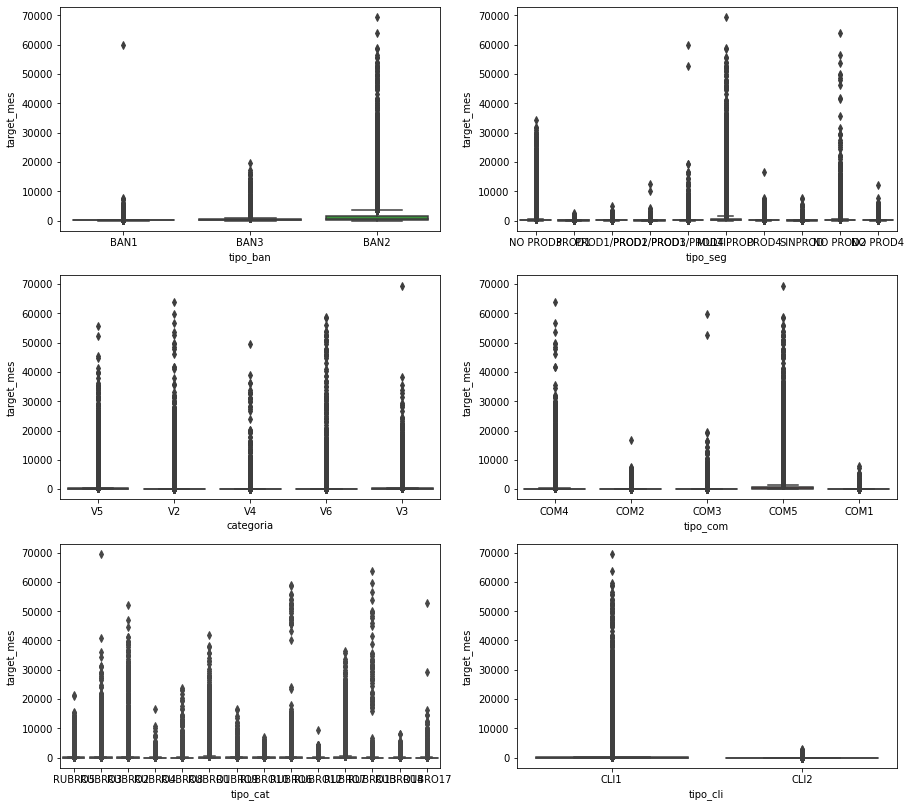

In [27]:
fig, axis = plt.subplots(3, 2, figsize=(15, 14))
plt.subplots_adjust(hspace=.2)
for column, ax in zip(categorical_columns, axis.flatten()):
    sns.boxplot(x=train_copy[column], y=train_copy.target_mes, ax=ax)